#Stub Residuals

In [13]:
# This will force external files to be reloaded
%load_ext autoreload
%autoreload 2
import utils.rootprint
import utils.rootnotes
from array import array

from utils.plotting import *

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors, gStyle, gDirectory
import math
from itertools import chain
gStyle.SetOptStat(000000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
def draw_resolution(input_file_name, parameter_name, y_max=0.005):
    input_file = TFile(input_file_name, "READ")
    c = TCanvas("c", "c", 600, 800)
    c.Divide(2, 3)
    # sigma = []
    for i in range(6):
        c.cd(i+1)
        h = input_file.FindObjectAny("stubDistanceTransverse_"+str(i)+"_vs_"+parameter_name)
        h.RebinX(2)
        h.FitSlicesY()
        h_2 = gDirectory.Get("stubDistanceTransverse_"+str(i)+"_vs_"+parameter_name+"_2")
        h_2.Draw()
        h_2.GetYaxis().SetRangeUser(0, y_max)
        # sigma.append(gDirectory.Get("stubDistanceTransverse_"+str(i)+"_vs_chargeOverPt_2"));
        # sigma[i].Draw()
    return c, h, h_2, input_file

In [155]:
input_file_name_Rz = "/Users/demattia/RemoteProjects/Test/matrixBuilderHistograms.root"
# input_file_name = "/Users/demattia/RemoteProjects/Test/StubDistanceFromGenTrack_2016.root"

# constants_dir = "/Users/demattia/RemoteProjects/Test/"
# fit_type = ""

constants_dir = "/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/"
# fit_type = "PreEstimate_Transverse_10_more/"
fit_type = "Combinations_Transverse_SecondOrder_ExtrapolatedRSecondOrderNonRadialStripCorrectionLookup_10_more"

file_name_list, legend_entry_list = generate_files_and_legend_entry_all_regions_6_6(constants_dir, fit_type)

# Extract the list of combinations indexes corresponding to the file_name_list.
# This is used for the Rz plot.
combination_index_list = []
for file_name in file_name_list:
    combination_index_list.append(file_name.split("_")[-1].split(".root")[0])


region = 1


input_file_name = file_name_list[region - 1].replace("linearFitterHistograms", "StubDistanceFromGenTrack")
comb_index = combination_index_list[region - 1]

print input_file_name

/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction//Combinations_Transverse_SecondOrder_ExtrapolatedRSecondOrderNonRadialStripCorrectionLookup_10_more/StubDistanceFromGenTrack_2016.root


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


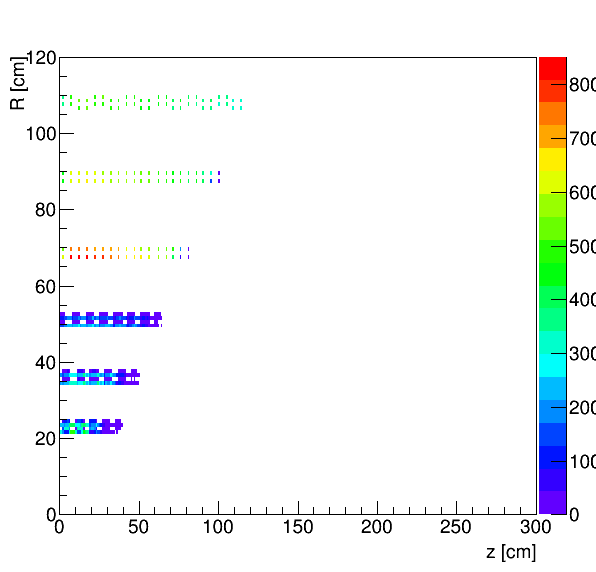

In [156]:
c = draw_Rz(input_file_name_Rz, comb_index)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


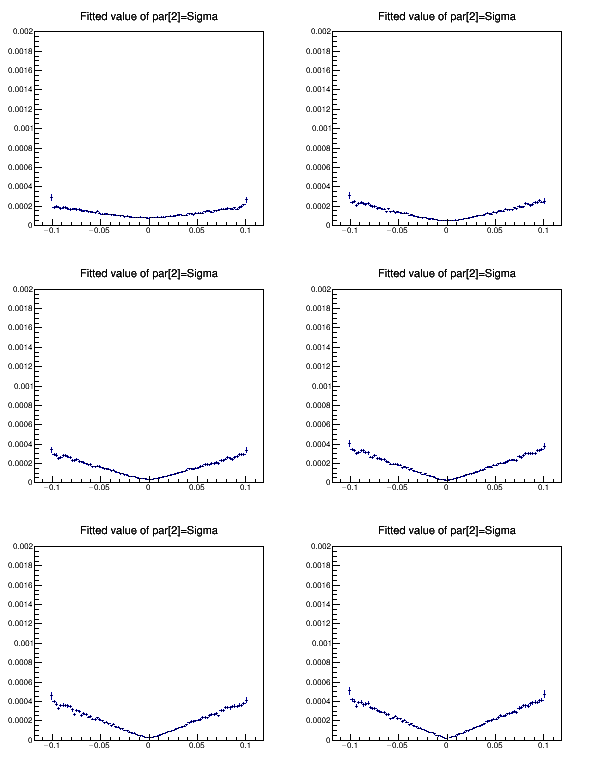

In [157]:
c = draw_resolution(input_file_name, "chargeOverPt", y_max=0.002)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


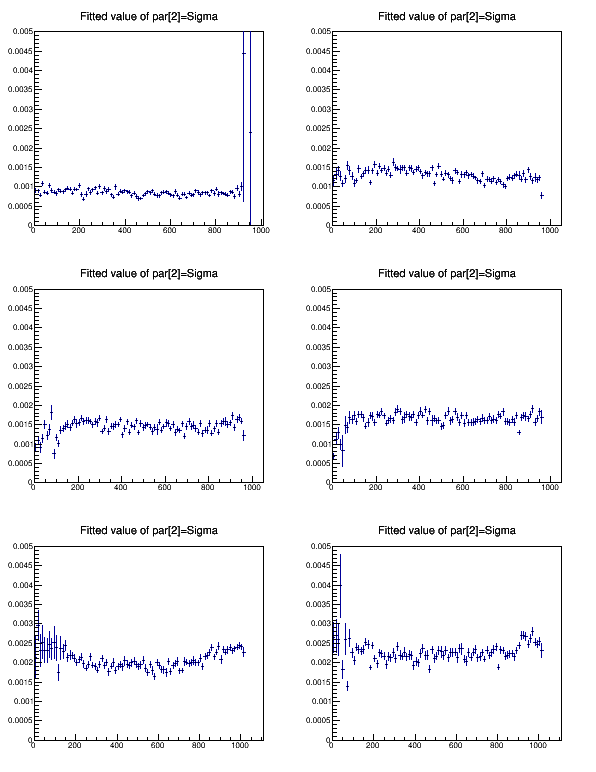

In [124]:
c = draw_resolution(input_file_name, "stripIndex")
c[0]

##phi coordinates resolution vs c/pT

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


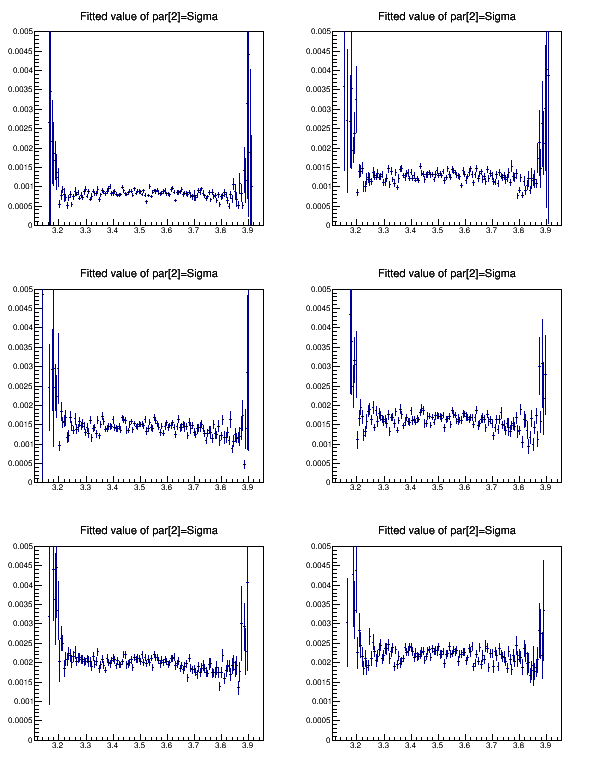

In [125]:
c = draw_resolution(input_file_name, "cotTheta")
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


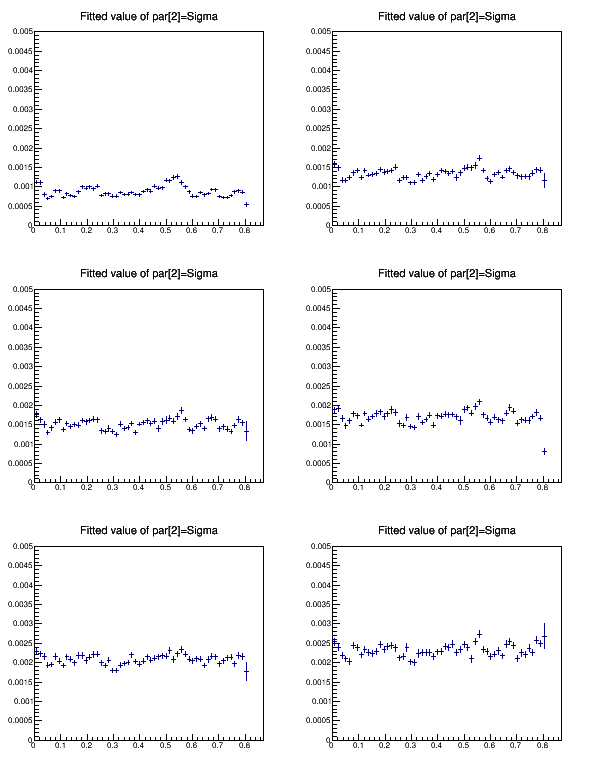

In [126]:
c = draw_resolution(input_file_name, "phi")
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


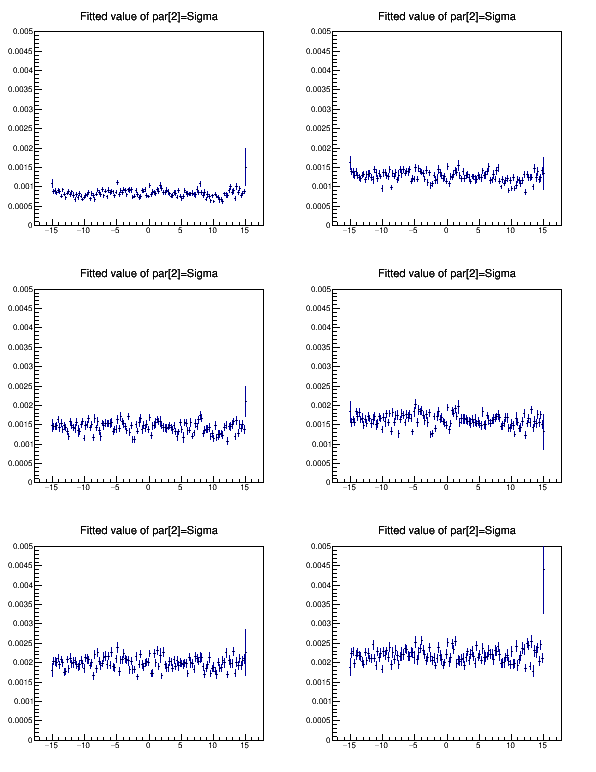

In [127]:
c = draw_resolution(input_file_name, "z0")
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_stubDistanceTransverse


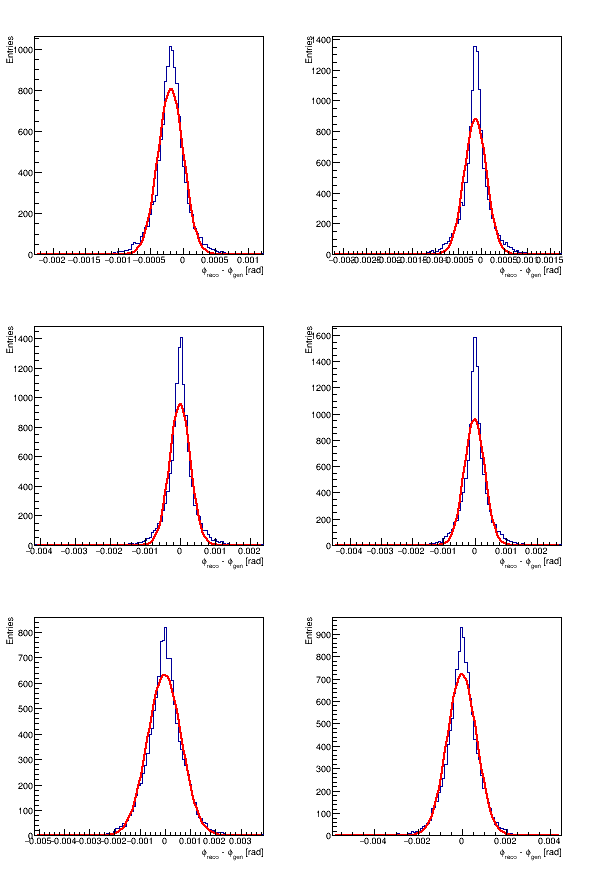

In [110]:
c = draw_stub_resolutions(input_file_name, "stubDistanceTransverse", "#phi_{reco} - #phi_{gen} [rad]",
                          -0.014, 0.014, fit = True)
c[1]

In [42]:
for sigma, sigma_err in zip(c[2], c[3]):
    print sigma, "+/-", sigma_err

0.000438008847861 +/- 1.23463890207e-06
0.00060028624525 +/- 1.7470632945e-06
0.000740893942438 +/- 2.13491102284e-06
0.000869150911138 +/- 2.49967120442e-06
0.000976910957211 +/- 2.84624934215e-06
0.00106867693644 +/- 3.11874631397e-06


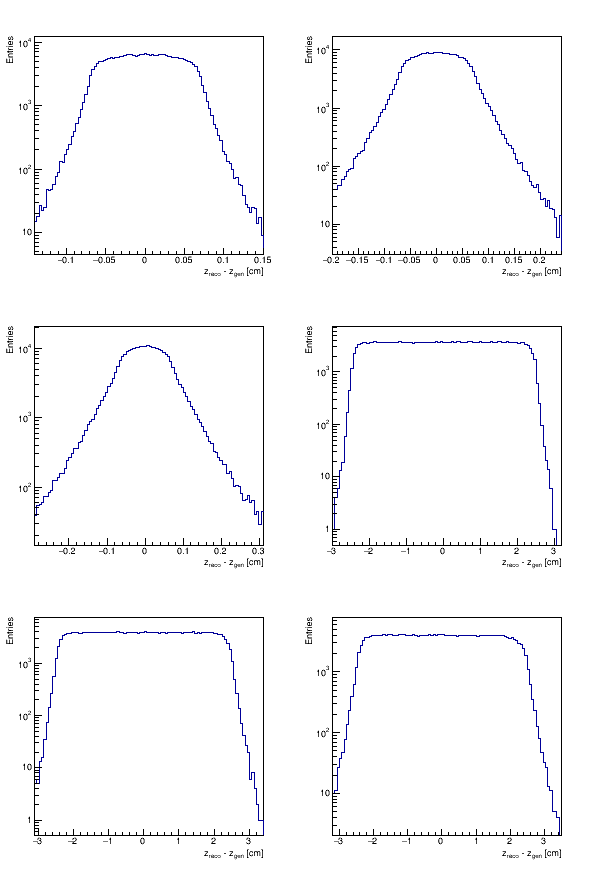

In [10]:
c = draw_stub_resolutions(input_file_name, "stubDistanceLongitudinal", "z_{reco} - z_{gen} [cm]", log_y = True)
c[1]

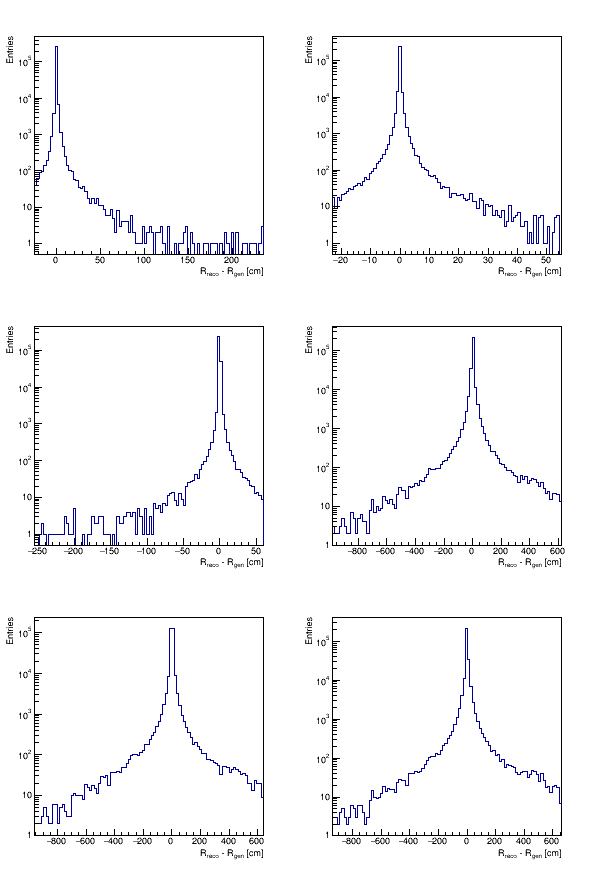

In [11]:
c = draw_stub_resolutions(input_file_name, "stubDistanceLongitudinalR", "R_{reco} - R_{gen} [cm]", log_y = True)
c[1]